In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import seaborn as sns
import os

plt.rcParams.update({
    "pdf.fonttype": 42,
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

In [8]:
results_path = Path('results')
compact_table_path_uncivil = results_path / 'compact_result_table_uncivil_without_duplicates.xlsx'
compact_table_path_civil = results_path / 'compact_result_table_civil_without_duplicates.xlsx'

uncivil = pd.read_excel(compact_table_path_uncivil)
uncivil = uncivil.ffill()
uncivil = uncivil.loc[~uncivil['Model'].isin(['toxicr', 'refined_model']).values]
uncivil = uncivil.loc[~uncivil['Strategy'].str.contains('role_based_')]  # excluir combinações com role-based
uncivil = uncivil.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-score'})

civil = pd.read_excel(compact_table_path_civil)
civil = civil.ffill()
civil = civil.loc[~civil['Model'].isin(['toxicr', 'refined_model']).values]
civil = civil.loc[~civil['Strategy'].str.contains('role_based_')]  # excluir combinações com role-based
civil = civil.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-score'})

<Figure size 1200x600 with 0 Axes>

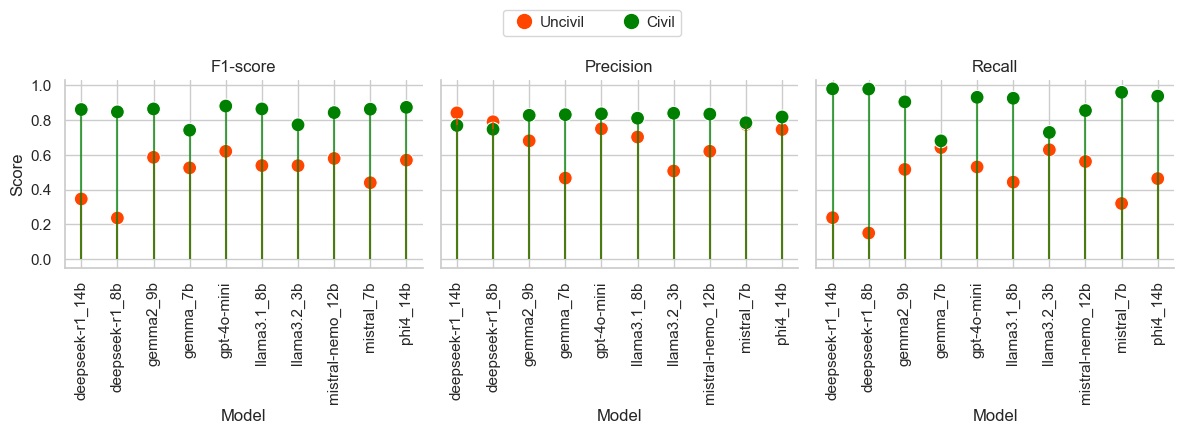

In [10]:
# Criando os DataFrames com os dados das imagens

# Dados do dataset "uncivil"
uncivil_data = uncivil.groupby('Model')[['F1-score', 'Precision', 'Recall']].mean().reset_index().copy()

# Dados do dataset "civil"
civil_data = civil.groupby('Model')[['F1-score', 'Precision', 'Recall']].mean().reset_index().copy()

# Transformando em DataFrames
df_uncivil = pd.DataFrame(uncivil_data)
df_civil = pd.DataFrame(civil_data)

# Adicionando rótulos
df_uncivil["Class"] = "Uncivil"
df_civil["Class"] = "Civil"

# Unindo os dois dataframes e pivotando para long format
df = pd.concat([df_uncivil, df_civil])
df_long = df.melt(id_vars=["Model", "Class"], var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Ordena os modelos como no original
model_order = df["Model"].unique()

# FacetGrid para cada métrica
g = sns.FacetGrid(df_long, col="Metric", sharey=True, height=4, aspect=1)
colors = {"Uncivil": "orangered", "Civil": "green"}

def lollipop(data, **kwargs):
    for _, row in data.iterrows():
        plt.vlines(row["Model"], ymin=0, ymax=row["Score"], color=colors[row["Class"]], alpha=0.7)
    sns.scatterplot(data=data, x="Model", y="Score", hue="Class", palette=colors, s=100, legend=False)

g.map_dataframe(lollipop)
g.set_xticklabels(rotation=90)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Model", "Score")

handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in colors.values()]
labels = list(colors.keys())
g.fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2, handletextpad=0.0001)

plt.tight_layout()


fig_path = results_path / 'figures'
os.makedirs(fig_path, exist_ok=True)
plt.savefig(fig_path / 'metrics_comparison.pdf', bbox_inches='tight', dpi=600)

plt.show()

In [110]:
uncivil.groupby('Model')[['F1-score', 'Precision', 'Recall']].mean()

,F1-score,Precision,Recall
Model,,,
deepseek-r1_14b,0.3464,0.8408,0.2388
deepseek-r1_8b,0.2368,0.7898,0.1506
gemma2_9b,0.5856,0.6806,0.5160
gemma_7b,0.5250,0.4662,0.6416
gpt-4o-mini,0.6200,0.7494,0.5302
llama3.1_8b,0.5382,0.7022,0.4432
llama3.2_3b,0.5376,0.5070,0.6288
mistral-nemo_12b,0.5790,0.6204,0.5616
mistral_7b,0.4396,0.7748,0.3202


In [87]:
civil.groupby('Model')[['F1-score', 'Precision', 'Recall']].mean()

,F1-score,Precision,Recall
Model,,,
deepseek-r1_14b,0.8602,0.7686,0.9790
deepseek-r1_8b,0.8466,0.7468,0.9778
gemma2_9b,0.8636,0.8270,0.9042
gemma_7b,0.7414,0.8306,0.6800
gpt-4o-mini,0.8802,0.8354,0.9304
llama3.1_8b,0.8636,0.8104,0.9250
llama3.2_3b,0.7722,0.8388,0.7286
mistral-nemo_12b,0.8426,0.8340,0.8542
mistral_7b,0.8622,0.7842,0.9592
